See considerations on dataset processing in evernote.

In [1]:
from utils import notes_in_sequence, notes_density

from parse_pianoroll import piano_roll_to_pretty_midi

from librosa import display

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import pypianoroll

from glob import glob

import tqdm

import pretty_midi

In [2]:
%ls d:\data\lpd_5_cleansed.tar\lpd_5\lpd_5_cleansed\A\A\A\TRAAAGR128F425B14B\b97c529ab9ef783a849b896816001748.npz

 Volume in drive D is Data
 Volume Serial Number is 16C2-7AA0

 Directory of d:\data\lpd_5_cleansed.tar\lpd_5\lpd_5_cleansed\A\A\A\TRAAAGR128F425B14B

04/15/2018  12:36 PM            56,228 b97c529ab9ef783a849b896816001748.npz
               1 File(s)         56,228 bytes
               0 Dir(s)  84,479,086,592 bytes free


# Get sequences for dataset

In [3]:
files = glob("d:\\data\\lpd_5_cleansed.tar\\lpd_5\lpd_5_cleansed\\E\\**\\*.npz", recursive=True)
print(len(files))

858


In [4]:
BAR_LEN = 96
NR_BARS = 2
SEQ_LEN = NR_BARS * BAR_LEN
# print('sequence_length = ', SEQ_LEN)

MIN_NOTES_PERC = .30 # otherwise a sequence is dropped (a note should be present in at least that many frames)

x_ = []
y_ = []
empty_sequences = 0

for file in tqdm.tqdm(files):
    roll = pypianoroll.load(file).tracks[4].pianoroll
    ones = np.ones_like(roll)
    roll = np.minimum(roll, ones)
    
    sequences_available = int(np.floor(roll.shape[0]/(SEQ_LEN)))

    # notes_played_all = np.argmax(roll, axis=1)
    # print('all notes ', notes_played_all)
    # print(len(notes_played_all))

    for seq_i in range(sequences_available):
        seq_i_start = seq_i * BAR_LEN
        seq_i_end = (seq_i + NR_BARS )* BAR_LEN
    #     print(seq_i_start, seq_i_end)
        sequence = roll[seq_i_start:seq_i_end]

        assert sequence.shape == (192, 128)
        
        if notes_density(sequence) >= MIN_NOTES_PERC:
            x_sequence = sequence[:-1]
            y_sequence = sequence[-1]
            x_.append(x_sequence)
            y_.append(y_sequence)
        else:
            empty_sequences += 1

    #     notes_played = np.argmax(sequence, axis=1)
    #     print('%s notes: ' %len(notes_played), notes_played)

    #     pm = piano_roll_to_pretty_midi(sequence.T, fs=48)

    #     plt.figure(figsize=(12, 8))
    #     plot_piano_roll(pm.instruments[0], 55, 70)
    #     plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 858/858 [00:19<00:00, 43.56it/s]


In [5]:
assert len(x_) == len(y_)

In [6]:
x_ = np.array(x_)
y_ = np.array(y_)

In [7]:
print(x_.shape, y_.shape)

(30039, 191, 128) (30039, 128)


In [8]:
np.save("dataset_A_x", x_)
np.save("dataset_A_y", y_)

# Debugging and exploration

In [2]:
data = pypianoroll.load("d:\\data\\lpd_5_cleansed.tar\\lpd_5\lpd_5_cleansed\\A\\A\\A\\TRAAAGR128F425B14B\\b97c529ab9ef783a849b896816001748.npz")

# Tracks names

In [3]:
for i, t in enumerate(data.tracks):
    print(i, t.name)

0 Drums
1 Piano
2 Guitar
3 Bass
4 Strings


# Plot pianoroll

(<Figure size 432x288 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9795F4588>,
       dtype=object))

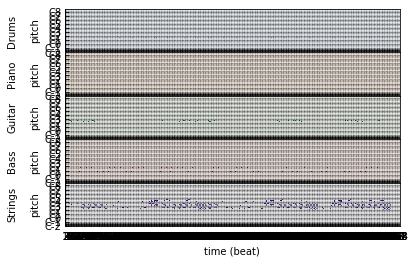

In [5]:
data.plot()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2291e295160>)

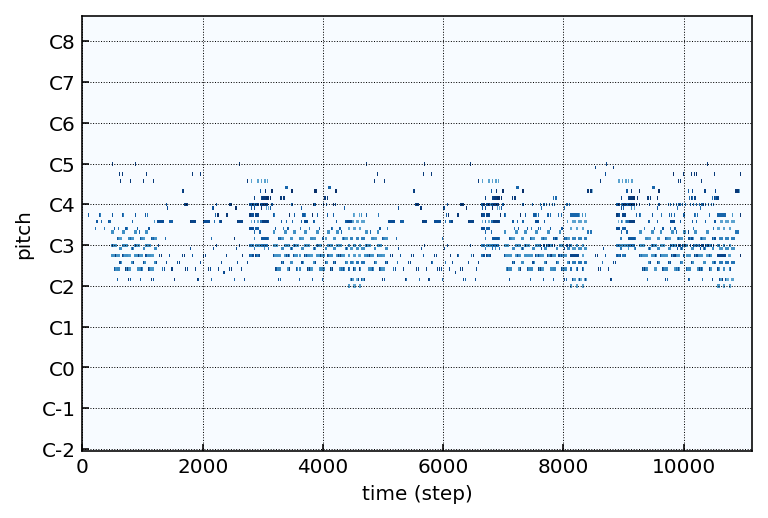

In [4]:
track = data.tracks[4]
track.plot()

In [5]:
track.pianoroll.shape

(11136, 128)

# Replace velocities with 1s

In [32]:
roll = track.pianoroll

In [33]:
ones = np.ones_like(roll,dtype=float)

In [34]:
new = np.minimum(ones,roll)

In [15]:
roll = roll[108:115]

In [35]:
new.shape

(11136, 128)

In [37]:
np.argmax(new[108:115],axis=1)

array([69, 69, 69,  0,  0,  0, 69], dtype=int64)

In [16]:
np.argmax(roll,axis=1)

array([69, 69, 69,  0,  0,  0, 69], dtype=int64)

In [19]:
roll[:,60:75]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 107,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 107,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 107,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  89,   0,   0,   0,
          0,   0]], dtype=uint8)

In [17]:
roll[:,]

array([[107, 107, 107,   0,   0,   0, 107],
       [107, 107, 107,   0,   0,   0, 107],
       [107, 107, 107,   0,   0,   0, 107],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [ 89,  89,  89,   0,   0,   0,  89]], dtype=uint8)

# Check if pianoroll is empty

In [7]:
roll = track.pianoroll

np.unique(np.argmax(roll, axis=1))

array([ 0, 50, 52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76,
       77, 79, 81, 83, 84], dtype=int64)

# Comparing with pretty_midi

In [8]:
pm = piano_roll_to_pretty_midi(roll.T, fs=52)

In [9]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    fmin = pretty_midi.note_number_to_hz(start_pitch)
    pianoroll = pm.get_piano_roll(fs)[start_pitch:end_pitch]
    display.specshow(pianoroll, hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note', fmin=fmin)

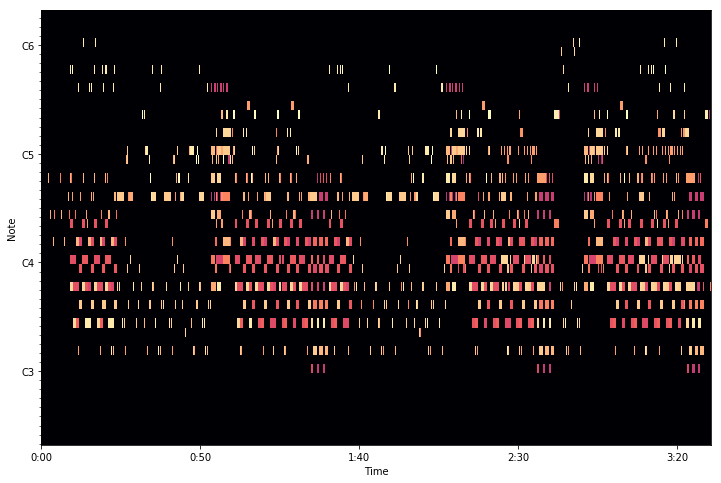

In [10]:
plt.figure(figsize=(12, 8))
plot_piano_roll(pm.instruments[0], 40, 88)